## Problem Description

### Objective
The goal is to analyze environmental data from multiple CSV files, focusing on various water quality parameters. This involves processing timestamped data, extracting relevant time components (month, day, year), and performing statistical analysis and visualization for each parameter.

### Data
The data consists of multiple CSV files located in a specified directory. Each file contains timestamped measurements of different water quality parameters, including:

* Water Temperature
* Total Suspended Solids (TSS)
* Chlorophyll-a
* Nutrient Nitrogen
* Salinity
* Phosphate Phosphorus
Each CSV file includes a timestamp column, which needs to be processed to extract the month, day, and year.

#### Tasks
1. Load and Combine Data:

Load all CSV files matching the pattern station*.csv from the specified directory.
Check if the timestamp column exists in each file.
Extract the month, day, and year from the timestamp column.
Combine all the data into a single DataFrame.

2. Data Processing:

For each water quality parameter, compute descriptive statistics for each month.
Specifically, for the year 2018, compute the descriptive statistics for each month.

3. Visualization:

Create three types of plots for each parameter:
Interannual Plot: Scatter plot of the parameter values over time (day of the year).
Seasonal Plot: Scatter plot of the parameter values against the month.
Box Plot: Monthly box plot showing the distribution of parameter values.

4. Statistical Analysis:

Generate descriptive statistics for each parameter for each month.
Compare the monthly statistics of the parameters for the year 2018.
### Steps
1. Load Files:

Use glob to find all CSV files in the specified directory.
Check if any files are found; if not, raise an error.

2. Process Each File:

Read each CSV file into a temporary DataFrame.
Check for the existence of the timestamp column.
Convert the timestamp column to extract month, day, and year.
Append the processed data to the main DataFrame.

3. Data Visualization:

Set aesthetic parameters using seaborn.
For each parameter:
Generate interannual, seasonal, and box plots.
Save the plots with appropriate filenames.
### Key Considerations
* Ensure that the combined DataFrame is not empty after processing all files.
* Handle any potential errors, such as missing timestamp columns.
* Properly format and label the plots for clear visualization.
* Save the plots in a specified directory with a consistent naming convention.
### Tools and Libraries
* pandas for data manipulation and analysis.
* numpy for numerical operations.
* datetime for handling date and time data.
* glob and os for file handling.
* matplotlib and seaborn for plotting and visualization.
### Expected Output
A combined DataFrame containing the processed data from all CSV files.
Descriptive statistics for each water quality parameter by month.
Interannual, seasonal, and box plots for each parameter, saved as PNG files.







In [11]:
import os
os.chdir ("/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs")

Found 5 files
Reading file: /Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/station-091028.csv
File /Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/station-091028.csv contains 154 rows and 38 columns
Reading file: /Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/station-091020.csv
File /Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/station-091020.csv contains 153 rows and 38 columns
Reading file: /Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/station-091023.csv
File /Users/taky/Librar

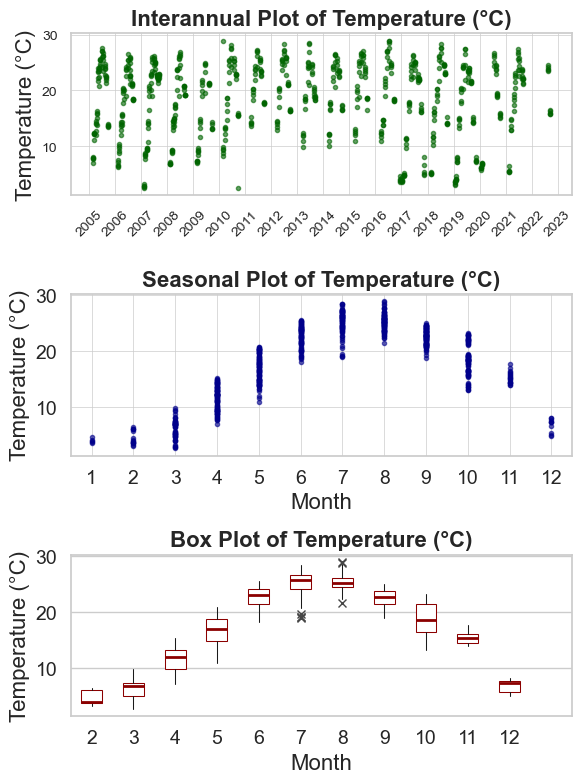

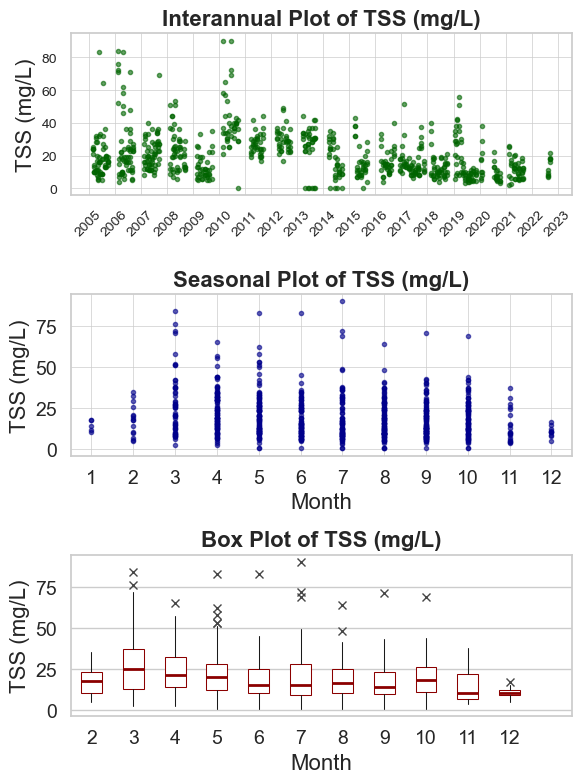

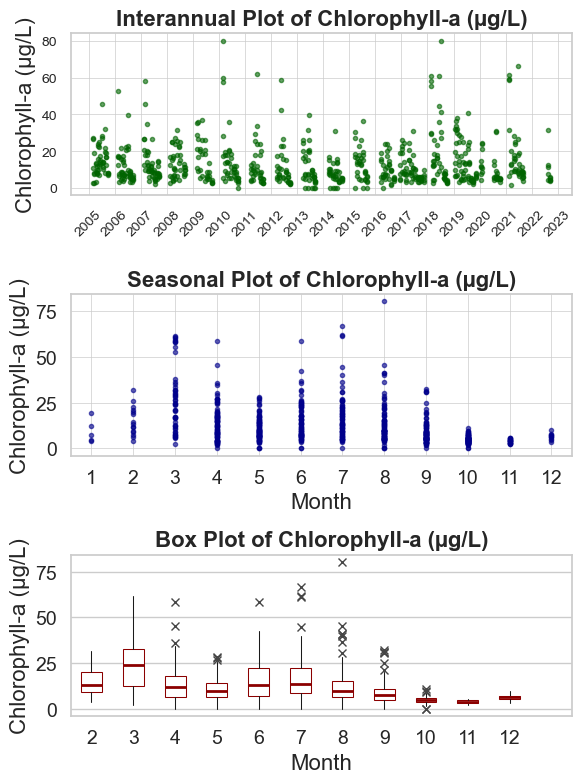

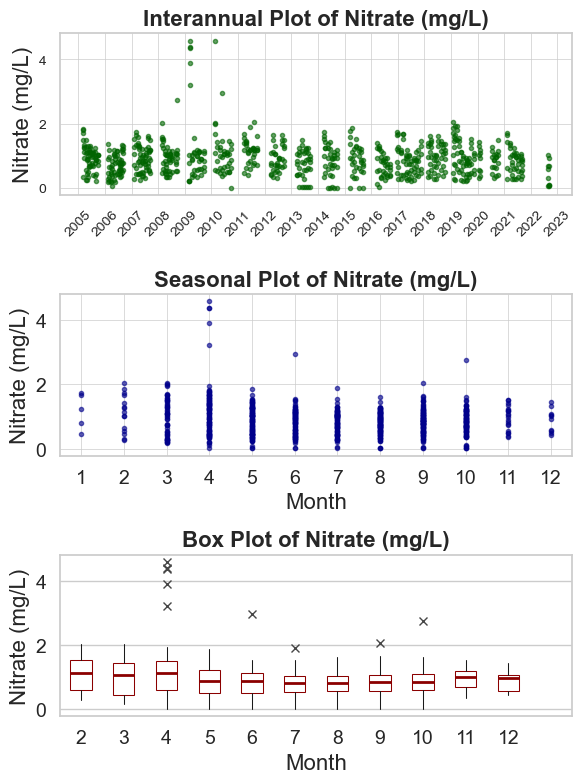

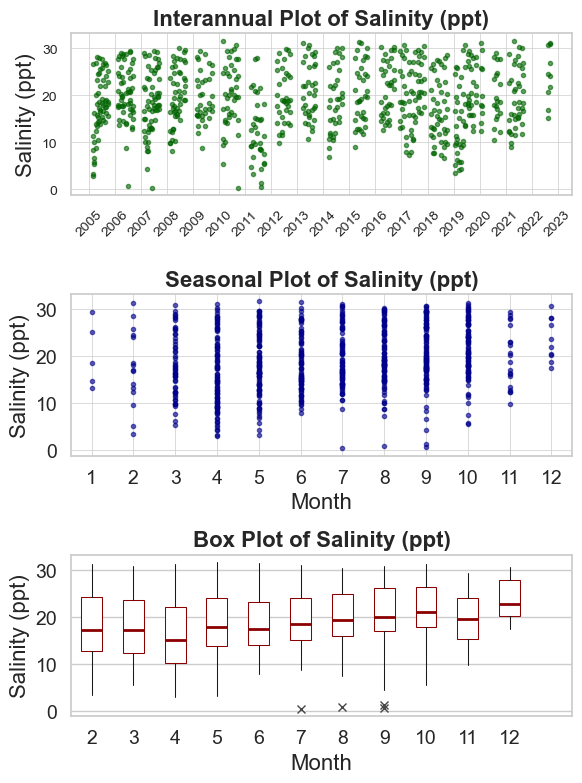

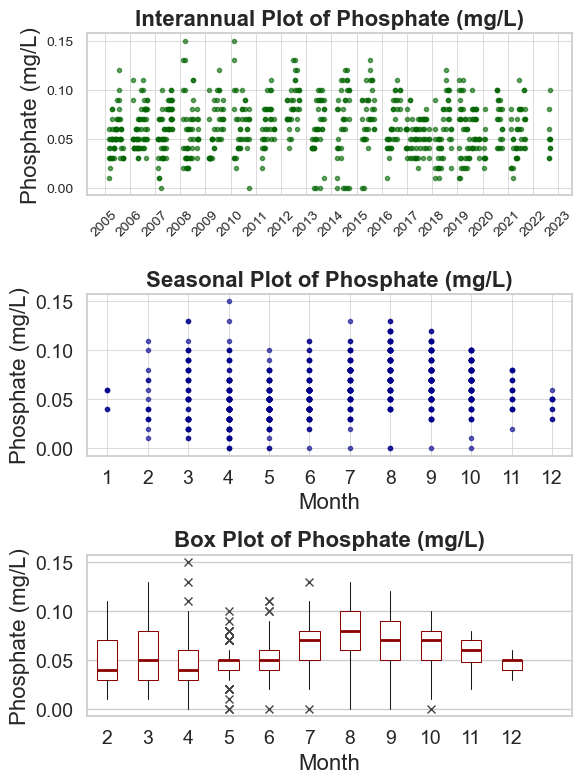

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import glob
import os

# Global Params
fdir = "/Users/taky/Library/CloudStorage/GoogleDrive-tahmid@udel.edu/Other computers/My Laptop/UDel/Fall 2023/MAST 638_Machine Learning/MAST638_HWs/data/hw02/"
vnames = ['water_temp_value', 'tss_value', 'chlora_value', 'nutrient_nitrogen_value', 'salinity_value', 'phosphate_phosphorus_value']
vdescs = ['Temperature (°C)', 'TSS (mg/L)', 'Chlorophyll-a (µg/L)', 'Nitrate (mg/L)', 'Salinity (ppt)', 'Phosphate (mg/L)']
ffig_pfx = './figures/HW2_fig'

# Load files
fnams = glob.glob(os.path.join(fdir, 'station*.csv'))
print(f"Found {len(fnams)} files")

if not fnams:
    raise ValueError("No files found. Check the directory path and file naming pattern.")

months = np.arange(1, 13, 1)

# Initialize an empty DataFrame
df = pd.DataFrame()

# Process each file
for fnam in fnams:
    print(f"Reading file: {fnam}")
    df_tmp = pd.read_csv(fnam)
    print(f"File {fnam} contains {df_tmp.shape[0]} rows and {df_tmp.shape[1]} columns")
    
    if 'timestamp' not in df_tmp.columns:
        raise ValueError(f"'timestamp' column not found in file {fnam}")

    ttmp = df_tmp['timestamp']
    mday = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').date() for d in ttmp]
    mmon = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').month for d in ttmp]
    myr = [dt.datetime.strptime(d, '%Y-%m-%d %H:%M:%S').year for d in ttmp]
    
    df_tmp['month'] = mmon
    df_tmp['mday'] = mday
    df_tmp['year'] = myr
    
    df = pd.concat([df, df_tmp])

# Ensure df is not empty
if df.empty:
    raise ValueError("The dataframe is empty. Check the file paths and content.")

print(f"Combined dataframe contains {df.shape[0]} rows and {df.shape[1]} columns")

# Set aesthetic parameters
sns.set(style="whitegrid")

# Statistics and plotting
for ivar in range(len(vnames)):
    vname = vnames[ivar]
    vdesc = vdescs[ivar]
    ffig = f'{ffig_pfx}_{vname[:-6]}_frame'
    
    var_stats = pd.DataFrame()
    var_COVID = pd.DataFrame()
    
    for mnow in months:
        tmp = df.loc[df.month == mnow, vname]
        tmp20 = df.loc[(df.month == mnow) & (df.year == 2018), vname]
        
        if mnow == 1:
            var_stats = tmp.describe().to_frame().T
            var_COVID = tmp20.describe().to_frame().T
        else:
            var_stats = pd.concat([var_stats, tmp.describe().to_frame().T])
            var_COVID = pd.concat([var_COVID, tmp20.describe().to_frame().T])
    
    var_stats.index = months
    var_COVID.index = months

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=False)
    
    # Interannual plot
    ax1 = axes[0]
    ax1.plot(df.mday, df[vname], 'o', markersize=3, color='darkgreen', alpha=0.6)
    vtmp = df[vname].copy()
    vtmp.iloc[0] = max(vtmp)
    vtmp.iloc[1] = min(vtmp)
    vtmp.iloc[2:] = np.nan
    ax1.plot(df.mday, vtmp, 'o', markersize=3, color='darkgreen', alpha=0.6)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
    ax1.grid(True, linewidth=0.5)
    ax1.tick_params(labelsize=10)
    ax1.set_ylabel(vdesc, fontsize=16)
    ax1.set_title(f'Interannual Plot of {vdesc}', fontsize=16, fontweight='bold')
    
    # Seasonal plot
    ax2 = axes[1]
    ax2.plot(df.month, df[vname], 'o', markersize=3, color='darkblue', alpha=0.6)
    ax2.set_xlabel('Month', fontsize=16)
    ax2.set_ylabel(vdesc, fontsize=16)
    ax2.grid(True, linewidth=0.5)
    ax2.set_xlim(0.5, 12.5)
    ax2.set_xticks(np.arange(1, 13, 1))
    ax2.tick_params(labelsize=14)
    ax2.set_title(f'Seasonal Plot of {vdesc}', fontsize=16, fontweight='bold')
    
    # Box plot
    ax3 = axes[2]
    sns.boxplot(data=df, x="month", y=vname, notch=False, showcaps=False,
                width=0.5, flierprops={"marker": "x", "markersize": 6},
                boxprops=dict(facecolor='w', edgecolor='darkred', linewidth=0.75),
                medianprops=dict(color='darkred', linewidth=2),
                whiskerprops=dict(color="k", linewidth=0.75), ax=ax3)
    ax3.set_xlim(0.5, 12.5)
    ax3.set_xticks(np.arange(1, 13, 1))
    ax3.tick_params(labelsize=14)
    ax3.set_xlabel('Month', fontsize=16)
    ax3.set_ylabel(vdesc, fontsize=16)
    ax3.set_title(f'Box Plot of {vdesc}', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(ffig, bbox_inches="tight", dpi=300)
    plt.show()
